<a href="https://colab.research.google.com/github/xinpeng13/JSC270_Assg2/blob/shanxinp/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import beta
from scipy.stats import expon
import matplotlib.pyplot as plt
import seaborn as sns

1 D)

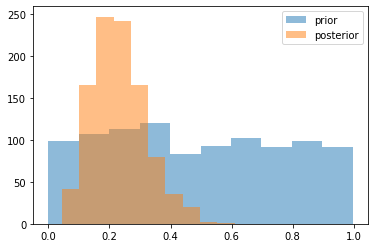

The prior mean is 0.48605135187538634, the posterior mean is 0.23255267924420372, the traditional likelihood estimate is 0.2


In [ ]:
np.random.seed(13)

def dist():
  x = np.random.beta(5,17) 
  return x

def prior_dist():
  x = np.random.beta(1,1) 
  return x


prior_sample = [prior_dist() for i in range(1000)]
posterior_sample = [dist() for i in range(1000)]

plt.hist(prior_sample, alpha=0.5, label = "prior")
plt.hist(posterior_sample, alpha=0.5, label = "posterior")
plt.legend(loc='upper right')
plt.show()

prior_mean = np.mean(prior_sample)
posterior_mean = np.mean(posterior_sample)

print("The prior mean is {}, the posterior mean is {}, the traditional likelihood estimate is 0.2".format(prior_mean, posterior_mean))

1 E)

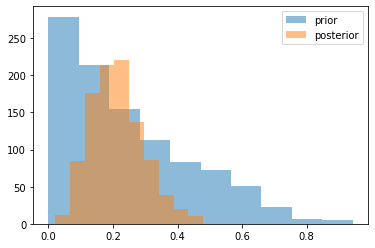

The prior mean is 0.24431529556297713, the posterior mean is 0.21364858173324835, the traditional likelihood estimate is 0.2


In [ ]:
np.random.seed(13)

def dist():
  x = np.random.beta(5,19) 
  return x

def prior_dist():
  x = np.random.beta(1,3) 
  return x


prior_sample = [prior_dist() for i in range(1000)]
posterior_sample = [dist() for i in range(1000)]

plt.hist(prior_sample, alpha=0.5, label = "prior")
plt.hist(posterior_sample, alpha=0.5, label = "posterior")
plt.legend(loc='upper right')
plt.show()

prior_mean = np.mean(prior_sample)
posterior_mean = np.mean(posterior_sample)

print("The prior mean is {}, the posterior mean is {}, the traditional likelihood estimate is 0.2".format(prior_mean, posterior_mean))

1 F)

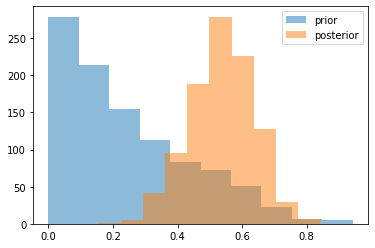

The prior mean is 0.24431529556297713, the posterior mean is 0.5382011666861066, the traditional likelihood estimate is 0.2


In [ ]:
np.random.seed(13)

def dist():
  x = np.random.beta(13,11) 
  return x

def prior_dist():
  x = np.random.beta(1,3) 
  return x


prior_sample = [prior_dist() for i in range(1000)]
posterior_sample = [dist() for i in range(1000)]

plt.hist(prior_sample, alpha=0.5, label = "prior")
plt.hist(posterior_sample, alpha=0.5, label = "posterior")
plt.legend(loc='upper right')
plt.show()

prior_mean = np.mean(prior_sample)
posterior_mean = np.mean(posterior_sample)

print("The prior mean is {}, the posterior mean is {}, the traditional likelihood estimate is 0.6".format(prior_mean, posterior_mean))

2 B)

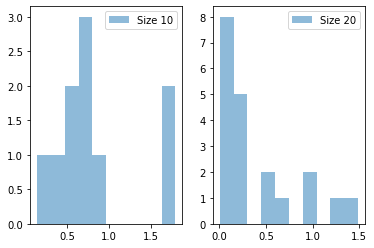

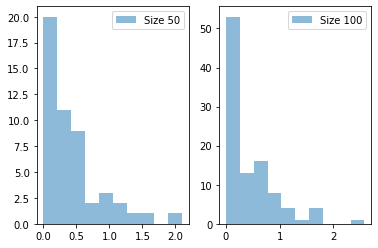

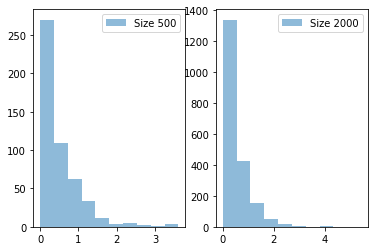

In [ ]:
np.random.seed(13)

def dist():
  x = np.random.exponential(0.5) 
  return x

def sample(n):
  x = [dist() for i in range(n)]
  return x

sample_10 = sample(10)
sample_20 = sample(20)
sample_50 = sample(50)
sample_100 = sample(100)
sample_500 = sample(500)
sample_2000 = sample(2000)

fig, (plt1, plt2) = plt.subplots(1, 2)
plt1.hist(sample_10, alpha=0.5, label = "Size 10")
plt1.legend(loc='upper right')
plt2.hist(sample_20, alpha=0.5, label = "Size 20")
plt2.legend(loc='upper right')
fig, (plt3, plt4) = plt.subplots(1, 2)
plt3.hist(sample_50, alpha=0.5, label = "Size 50")
plt3.legend(loc='upper right')
plt4.hist(sample_100, alpha=0.5, label = "Size 100")
plt4.legend(loc='upper right')
fig, (plt5, plt6) = plt.subplots(1, 2)
plt5.hist(sample_500, alpha=0.5, label = "Size 500")
plt5.legend(loc='upper right')
plt6.hist(sample_2000, alpha=0.5, label = "Size 2000")
plt6.legend(loc='upper right')
plt.show()

2 C)

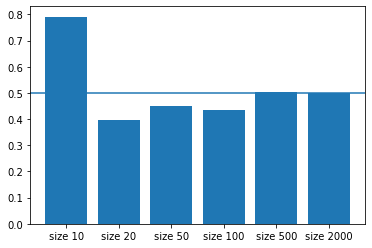

In [ ]:
list_y = [np.mean(sample_10), np.mean(sample_20), np.mean(sample_50), np.mean(sample_100), np.mean(sample_500), np.mean(sample_2000)]
list_x = ['size 10',  'size 20', 'size 50', 'size 100', 'size 500', 'size 2000']
plt.bar(list_x, list_y)
plt.axhline(0.5)

3 A）

In [ ]:
np.random.seed(15)
def simulate_data(n):
  x1_sample = [np.random.uniform(-100, 100) for i in range(n)]
  x2_sample = [np.random.uniform(-150, 150) for i in range(n)]
  di_sample = [np.random.choice([0, 1, 2, 3, 4,])for i in range(n)]
  eps_sample = [np.random.normal(0, 4)for i in range(n)]
  
  x1_sample = np.reshape(x1_sample,newshape=(n,1))
  x2_sample = np.reshape(x2_sample,newshape=(n,1))
  di_sample = np.reshape(di_sample,newshape=(n,1))
  eps_sample = np.reshape(eps_sample,newshape=(n,1))
  
  # Generate response (including error)
  t = 5+0.6*x1_sample + 0.8*x2_sample + 0.4* di_sample+ eps_sample
  pi = np.exp(t)/(np.exp(t)+1)
  y = (pi > 0.5).astype(float)

  # Add leading column of ones for intercept
  lead_ones = np.ones((n,1))
  
  X = np.concatenate([lead_ones,x1_sample, x2_sample, di_sample],axis=1) 

  return X,y

simulate = simulate_data(1000)

3 B)

0.9857482185273159 0.9811320754716981


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


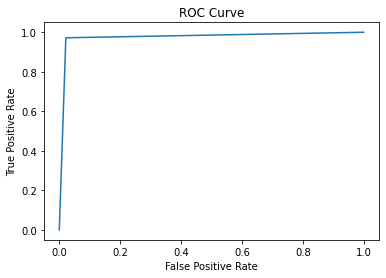

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
np.random.seed(15)
# Split data into train and test sets using 80/20 split

X_train, X_test, y_train, y_test = train_test_split(simulate[0], simulate[1], test_size = 0.2, shuffle=True, random_state=10)

log = LogisticRegression(fit_intercept = True, max_iter=1000, penalty= 'none')

# Fit the model to the data
log.fit(X_train, y_train)


# Get fitted values from training set
y_train_preds = log.predict(X_train)

# Get fitted values from test set
y_test_preds = log.predict(X_test)

# We need only give each of these metrics our true labels and predicted values

# Precision(TP/TP + FP)
train_prec= precision_score(y_train, y_train_preds)
test_prec = precision_score(y_test, y_test_preds)

print(train_prec, test_prec)

# Recall(TP/TP + FN)
train_rec = recall_score(y_train, y_train_preds)
test_rec= recall_score(y_test, y_test_preds)

# F1 Score[2*(Precision*Recall)/(Precision + Recall)]
train_f1= f1_score(y_train, y_train_preds)
test_f1 = f1_score(y_test, y_test_preds)

fpr, tpr, thresholds = roc_curve(y_test, y_test_preds, pos_label = 1)

plt.plot(fpr,tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



3 C)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

arr = np.empty(5000)
for i in range(5000):
  resample_X = np.zeros((1000, 4))
  resample_y = np.zeros((1000, 1))
  for j in range(len(resample_X)):
    num = np.random.choice(len(simulate[0]))
    resample_X[j] = simulate[0][num]
    resample_y[j] = simulate[1][num]

  dt = DecisionTreeClassifier(max_depth= 6, random_state = 15, max_features= 'log2')
  dt.fit(resample_X, resample_y)
  resample_preds = dt.predict(resample_X)
  precision= precision_score(resample_y, resample_preds)
 #f1 = f1_score(resample_y, resample_preds)
  arr[i] = precision


arr

array([0.98830409, 0.99808061, 0.98550725, ..., 0.98058252, 0.98825832,
       0.96174863])

3 D)

(array([2.000e+00, 3.000e+00, 1.400e+01, 1.600e+01, 4.400e+01, 6.900e+01,
        1.100e+02, 2.840e+02, 1.041e+03, 3.417e+03]),
 array([0.85853659, 0.87268293, 0.88682927, 0.90097561, 0.91512195,
        0.92926829, 0.94341463, 0.95756098, 0.97170732, 0.98585366,
        1.        ]),
 <a list of 10 Patch objects>)

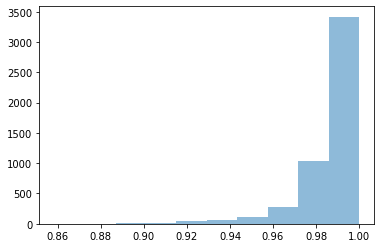

In [ ]:
plt.hist(x = arr, alpha=0.5)

3 F)

In [ ]:
dt_mean = arr.mean()

print("the precision of test set in part A is {}, for training set is {}, the mean of precision in part D is {}".format(test_prec,train_prec, dt_mean))

the precision of test set in part A is 0.9811320754716981, for training set is 0.9857482185273159, the mean of precision in part D is 0.9865938421909175
